In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
import statsmodels.api as sm

In [2]:
df= pd.read_csv("song_data.csv")
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [3]:
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

In [4]:
song_names = df['song_name'].tolist()
codigos = {}
resultado = []
for valor in song_names:
    if valor not in codigos:
        codigos[valor] = len(codigos) + 1
    resultado.append(codigos[valor])

df['song_code'] = resultado


In [5]:
data_copia = df.copy()
data_copia['song_name'] = resultado

In [6]:
data_copia.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_code
0,1,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,1
1,2,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,2
2,3,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,3
3,4,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,4
4,5,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,5


In [7]:
# 1. Crear una copia del DataFrame original
data2 = df.copy()

# 2. Recorrer todas las columnas del DataFrame
for columna in data2.columns:

    # 3. Verificar si la columna es de tipo object (texto / categórica)
    if data2[columna].dtype == 'object':

        codigos = {}              # Diccionario para asignar códigos únicos
        codificada = []           # Lista para guardar los valores numéricos

        for valor in data2[columna]:
            if valor not in codigos:
                codigos[valor] = len(codigos) + 1
            codificada.append(codigos[valor])

        # 4. Reemplazar directamente en la copia
        data2[columna] = codificada
data2.head()
data2.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence', 'song_code'],
      dtype='object')

In [8]:
data3 = ['song_popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'audio_valence', 'tempo']
data4 = data2[data3]
X = data4.drop(columns=['song_popularity'])
y = data4['song_popularity']
X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:        song_popularity   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     110.0
Date:                Tue, 29 Apr 2025   Prob (F-statistic):          1.93e-180
Time:                        17:37:04   Log-Likelihood:                -84434.
No. Observations:               18835   AIC:                         1.689e+05
Df Residuals:                   18826   BIC:                         1.690e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               65.8320      1.791  

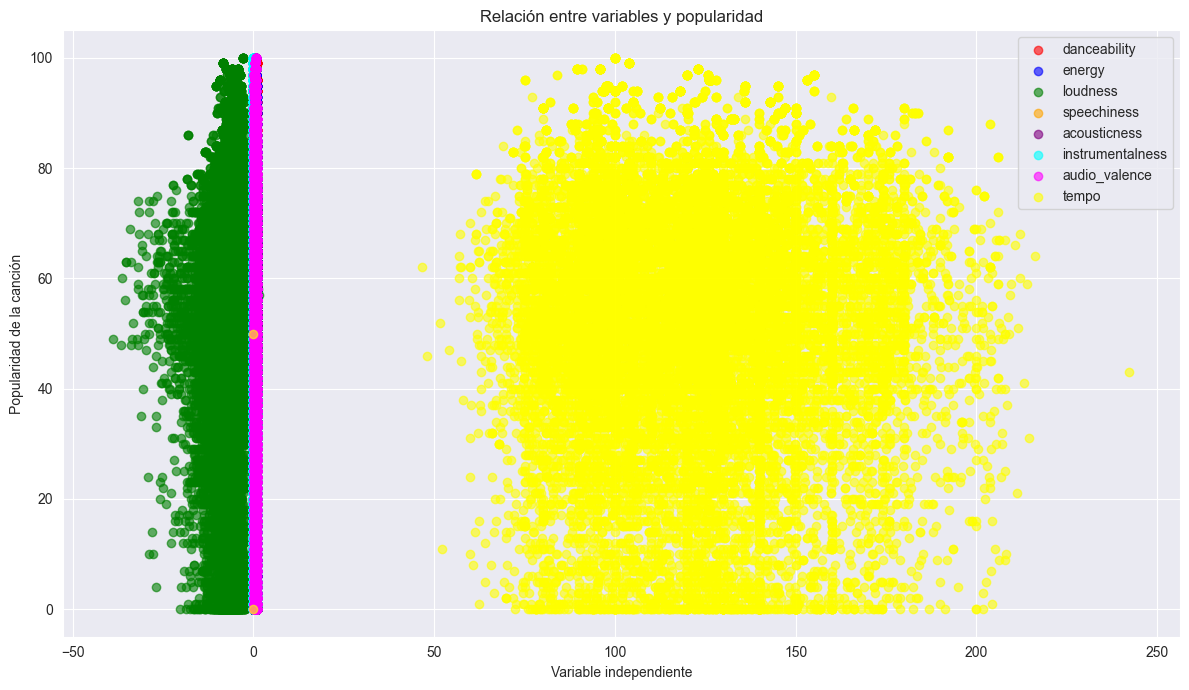

In [9]:
plt.figure(figsize=(12, 7))
colores = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow']
variables = data4.columns.drop('song_popularity')
for i, var in enumerate(variables):
    plt.scatter(data4[var], data4['song_popularity'], color=colores[i % len(colores)], label=var, alpha=0.6)
plt.xlabel('Variable independiente')
plt.ylabel('Popularidad de la canción')
plt.title('Relación entre variables y popularidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


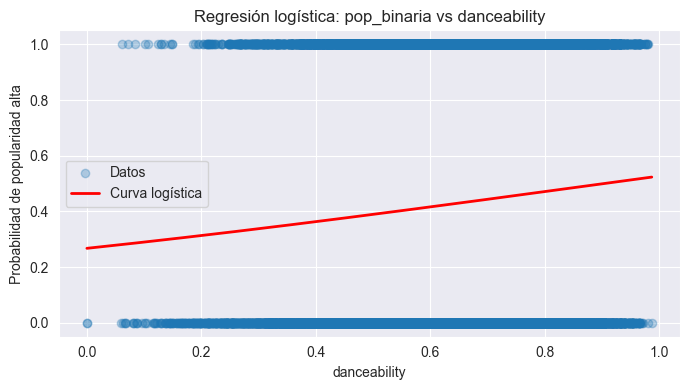

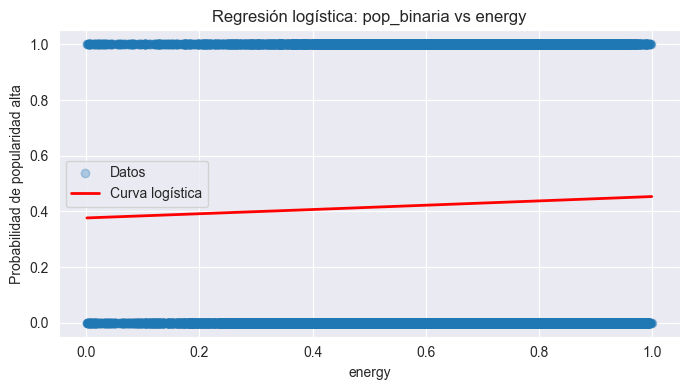

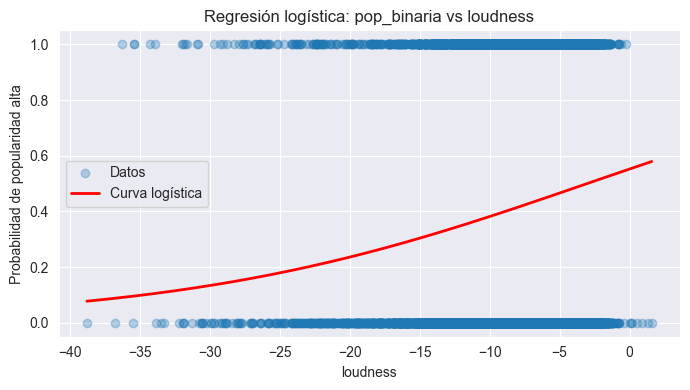

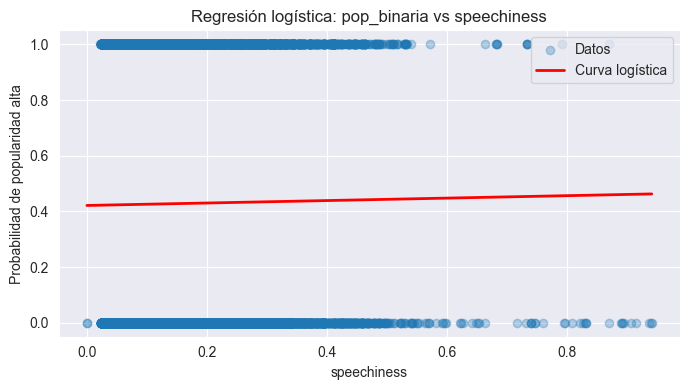

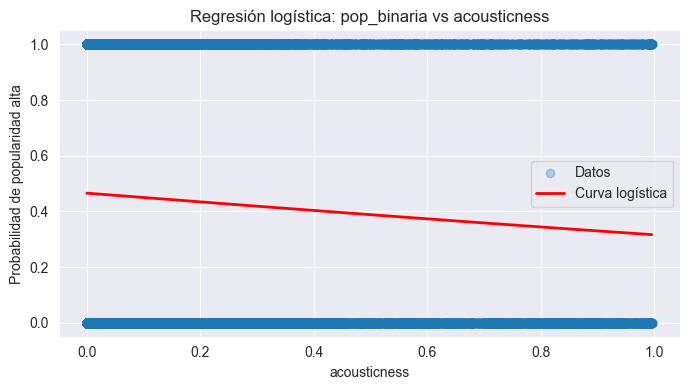

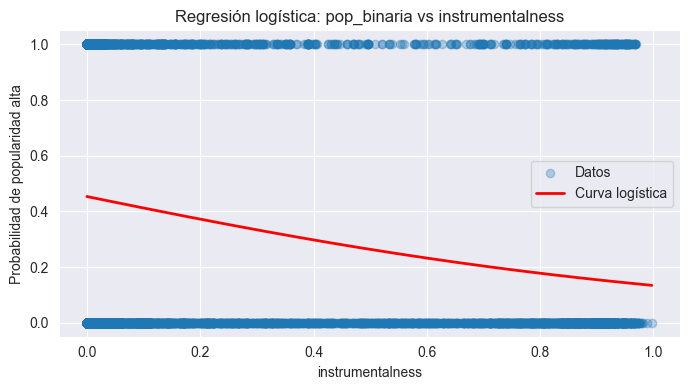

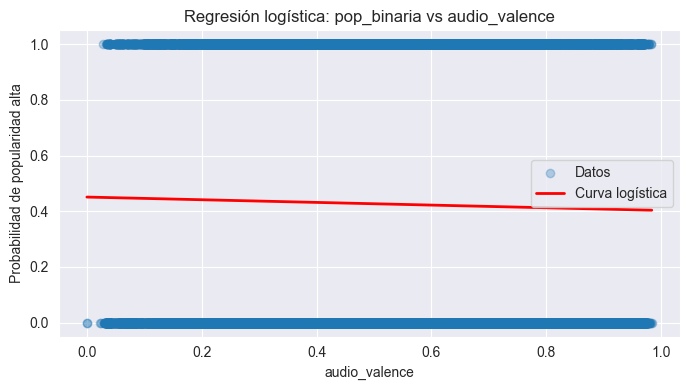

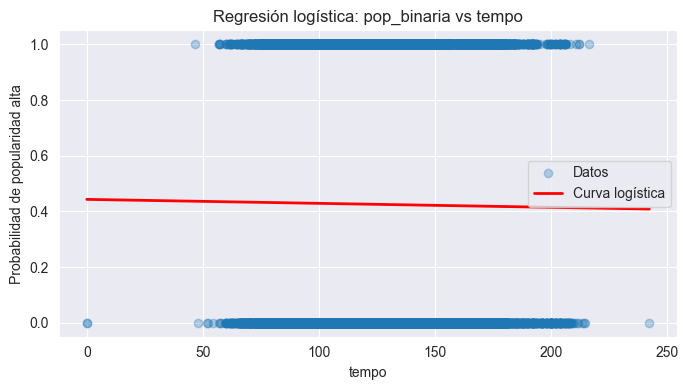

ValueError: could not convert string to float: 'Alta'

<Figure size 700x400 with 0 Axes>

In [28]:
variables = data4.columns.drop('song_popularity')

for var in variables:
    plt.figure(figsize=(7, 4))
    sns.regplot(x=data4[var], y=data4['song_popularity'], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    plt.title(f'Regresión lineal: song_popularity vs {var}')
    plt.xlabel(var)
    plt.ylabel('song_popularity')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [25]:
data4.loc[:, 'popularity_bucket'] = pd.cut(data4['song_popularity'], bins=[-1, 30, 60, 100], labels=['Baja', 'Media', 'Alta'])


C:\Users\hp\AppData\Local\Temp\ipykernel_32228\1769238382.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='popularity_bucket', y='danceability', data=data4, palette='coolwarm')


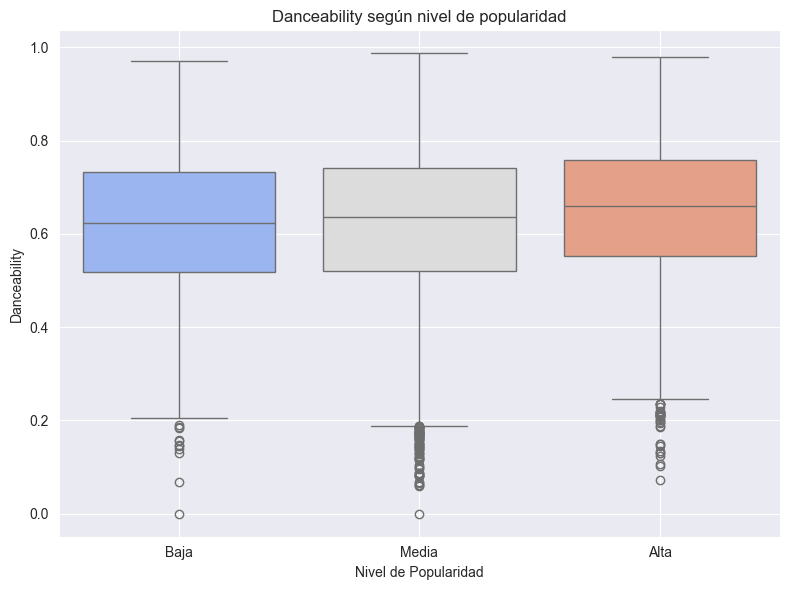

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='popularity_bucket', y='danceability', data=data4, palette='coolwarm')
plt.title('Danceability según nivel de popularidad')
plt.xlabel('Nivel de Popularidad')
plt.ylabel('Danceability')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_32228\1818316949.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = data4.groupby('popularity_bucket').mean()


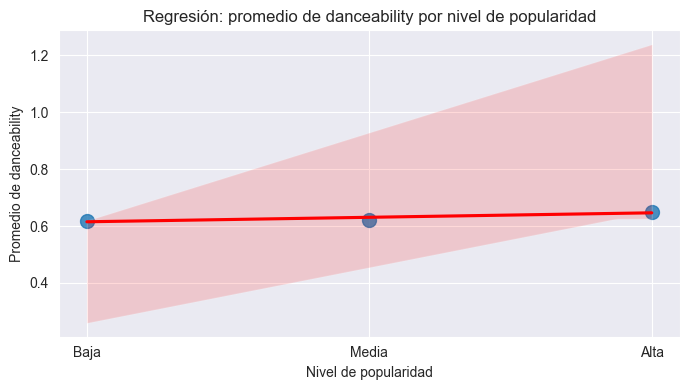

In [13]:
mean_values = data4.groupby('popularity_bucket').mean()
x = ['Baja', 'Media', 'Alta']
y = mean_values['danceability'].values

plt.figure(figsize=(7, 4))
sns.regplot(x=[1, 2, 3], y=y, scatter_kws={'s': 100}, line_kws={'color':'red'})
plt.xticks([1, 2, 3], x)
plt.title('Regresión: promedio de danceability por nivel de popularidad')
plt.xlabel('Nivel de popularidad')
plt.ylabel('Promedio de danceability')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_32228\928973705.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = data4.groupby('popularity_bucket')[variables].mean()


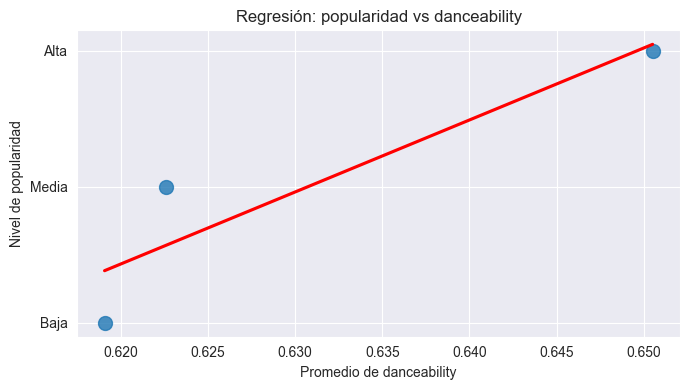

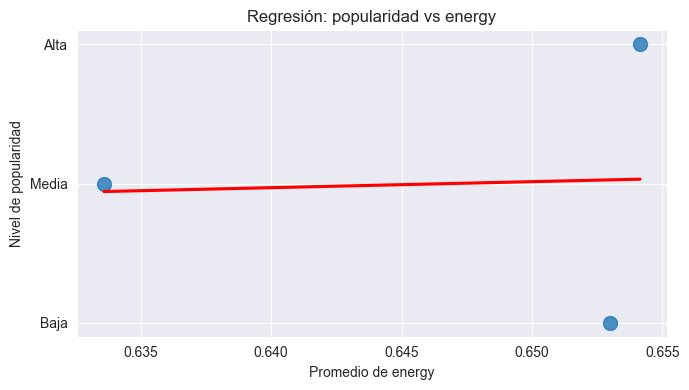

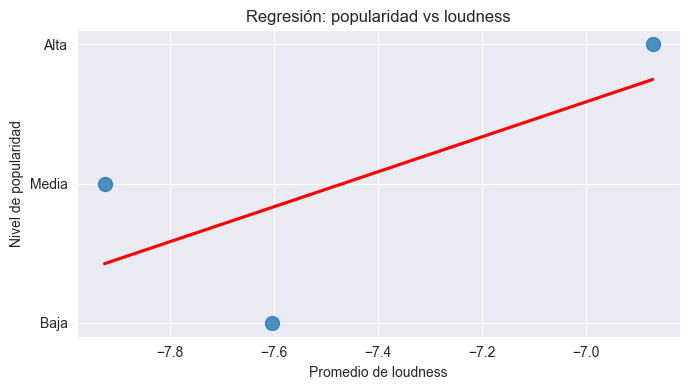

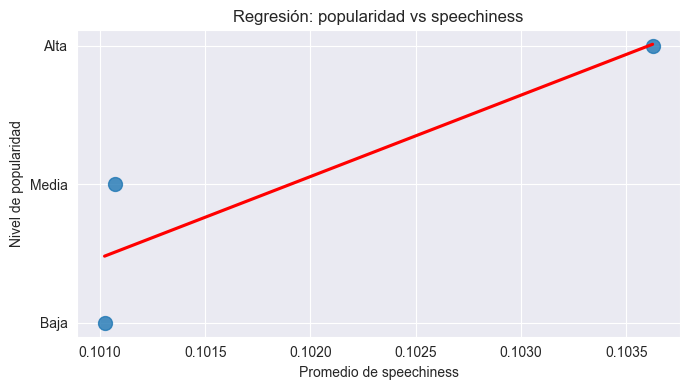

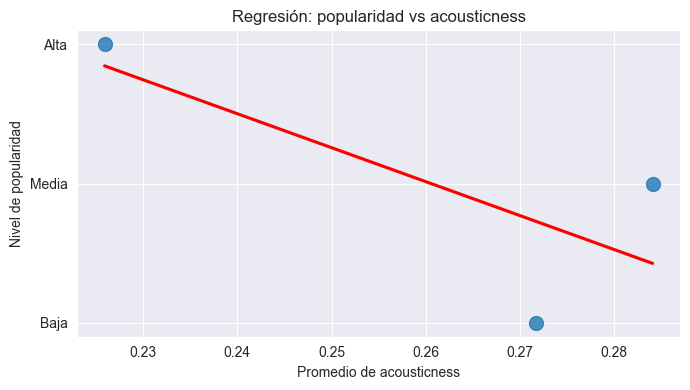

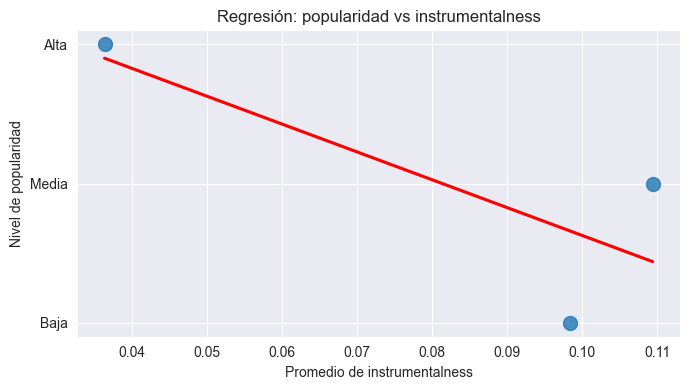

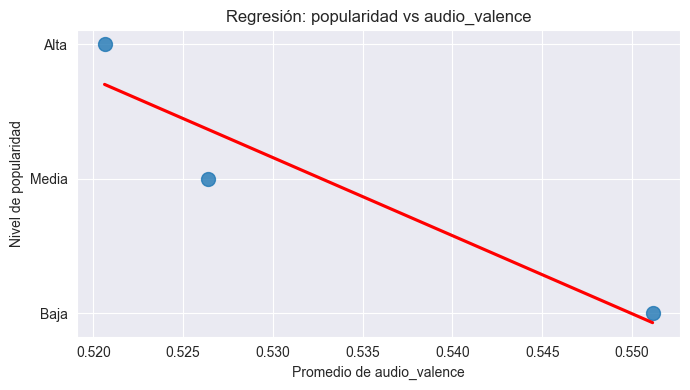

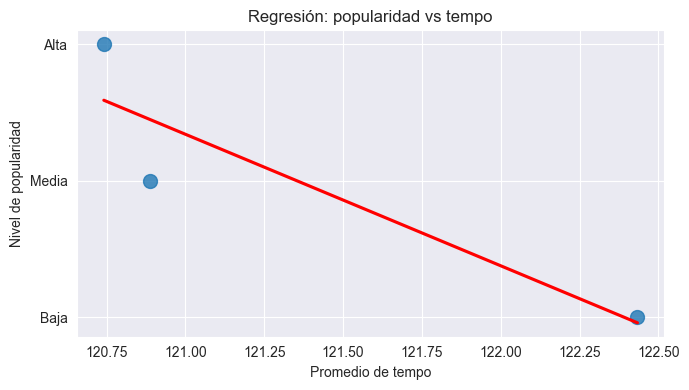

In [29]:
variables = ['danceability', 'energy', 'loudness', 'speechiness',
             'acousticness', 'instrumentalness', 'audio_valence', 'tempo']

mean_values = data4.groupby('popularity_bucket')[variables].mean()

for var in variables:
    plt.figure(figsize=(7, 4))
    sns.regplot(y=[1, 2, 3], x=mean_values[var], scatter_kws={'s': 100}, line_kws={'color':'red'}, ci=None)
    plt.yticks([1, 2, 3], ['Baja', 'Media', 'Alta'])
    plt.title(f'Regresión: popularidad vs {var}')
    plt.ylabel('Nivel de popularidad')
    plt.xlabel(f'Promedio de {var}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_15584\3925839360.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = data4.groupby('popularity_bucket')[variables].mean()


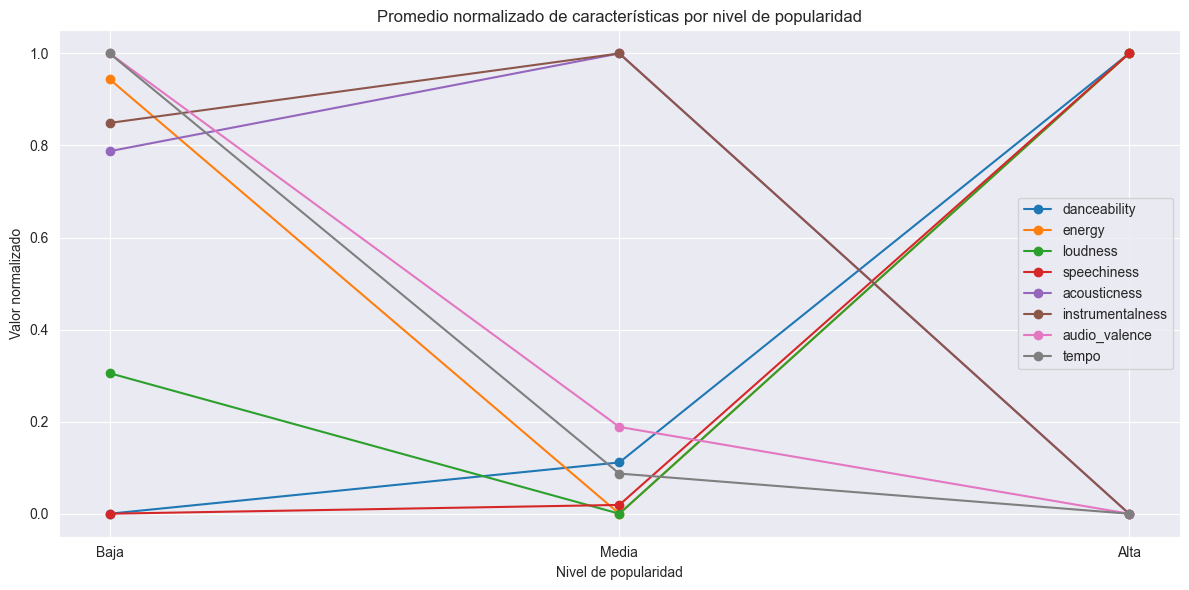

In [31]:
import matplotlib.pyplot as plt
variables = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'audio_valence', 'tempo']
mean_values = data4.groupby('popularity_bucket')[variables].mean()
mean_values_normalized = (mean_values - mean_values.min()) / (mean_values.max() - mean_values.min())
plt.figure(figsize=(12, 6))

for var in variables:
    plt.plot(['Baja', 'Media', 'Alta'], mean_values_normalized[var], marker='o', label=var)

plt.title('Promedio normalizado de características por nivel de popularidad')
plt.xlabel('Nivel de popularidad')
plt.ylabel('Valor normalizado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


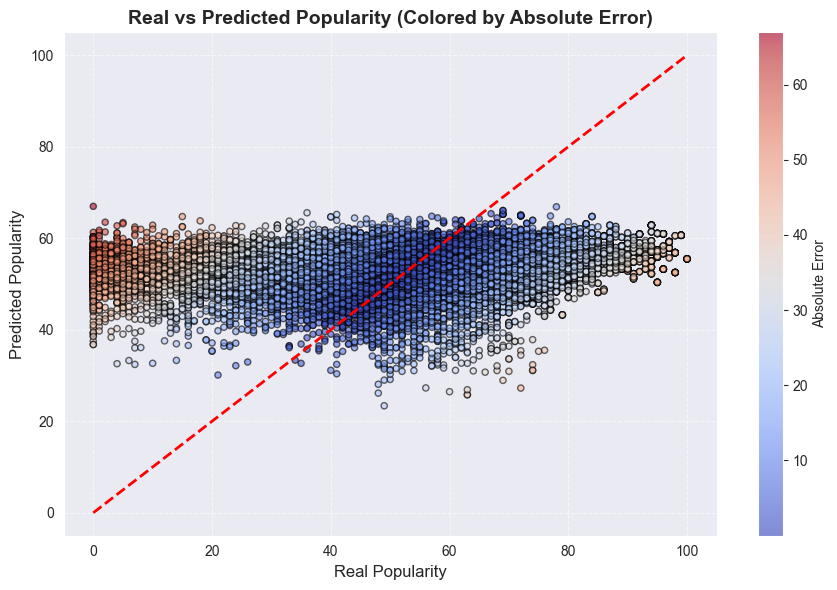

In [36]:
errors = np.abs(data4['song_popularity'] - data4['song_popularity_pred'])
plt.figure(figsize=(9, 6))
scatter = plt.scatter(data4['song_popularity'], data4['song_popularity_pred'],
                      c=errors, cmap='coolwarm', alpha=0.6, s=20, edgecolor='k')

plt.plot([0, 100], [0, 100], color='red', linestyle='--', linewidth=2)

plt.xlabel('Real Popularity', fontsize=12)
plt.ylabel('Predicted Popularity', fontsize=12)
plt.title('Real vs Predicted Popularity (Colored by Absolute Error)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Absolute Error')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
